## Project: Parkinson's disease

Submitted by: Mehul Soni

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from scipy.stats import zscore
from sklearn.model_selection import StratifiedKFold

In [3]:
PD_df = pd.read_csv('dataset.csv')

In [4]:
PD_df.head(10) #An overview of the data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.4148,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.4584,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.4299,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.4350,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.4174,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.4156,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.5960,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.6374,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.6156,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.5470,0.798463,-5.011879,0.325996,2.432792,0.271362


The first thing that comes to attention is the different ranges of values across attributes, with some features having values within 0-1 and some having larger values. This can be attributed to the fact that the units are different for the attributes, including frequency in hz, percentage values, ratios.

In [5]:
PD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

1. No empty values
2. Out of the 24 columns, 22 columns represent the attrobutes/features, 1 column represents the subject names and the status column is the target variable to be classified, showing whether the particular patient has Parkinson's disease (1) or (0)

In [6]:
PD_df['name'].nunique() #this gives the number of unique patients and since this number os 195, there are no duplicates

195

In [7]:
PD_df_copy = PD_df.copy(deep=True)

In [8]:
PD_df_1 = PD_df.drop(['name'], axis=1) #Dropping the name column as it is not required for the analysis

In [9]:
PD_df_1.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.4148,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.4584,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.4299,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.4350,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.4174,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
disease_status = PD_df_1['status'] #The variable to be classified

In [11]:
disease_status.value_counts() #1: subjects having parkinson's disease, 0: healthy

1    147
0     48
Name: status, dtype: int64

This shows a clear indication of an imbalanced dataset with only 48 values out of 195 belonging to the healthy class. This is a challenge for the classification problem.

In [12]:
#Creating a dataframe consisting of only the attributes
PD_df_1_attributes = PD_df_1.drop(['status'], axis =1)
features = PD_df_1_attributes.columns

In [13]:
#Creating categories of features, grouping similar attributes together
freq_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)','MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
amplitude_features = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']
ratios_noise_to_tonal = ['NHR', 'HNR']
nonlinear_complexity = ['RPDE', 'D2']
fractal_scaling_exponent = ['DFA']
nonlinear_freq_variation = ['spread1', 'spread2', 'PPE ']

In [14]:
#This gives an idea of the central tendency values for the data
PD_df_1_attributes.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103938,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000010,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256600,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421300,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.496000,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587600,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685200,0.825288,-2.434031,0.450493,3.671155,0.527367


1. There are a lot of different measurements and range of values, hence it would be important to scale the data for a good visualization. 
2. The median values are less than the mean values for almost majority of the features, which gives us a hint about skewness in the data which we will be able to observe using the distribution in pairplot.
3. There is a high standard of deviation for the attributes, which could affect the classification.
4. If we look at the MDVP:Fhi(Hz), which represents the maximum vocal fundamental frequency, we can see the values range from a min of 116 to a value as high as 592 which is a lot of variation for the amount of rows we have in the data, and especially comparing it with the rest of the attributes.

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


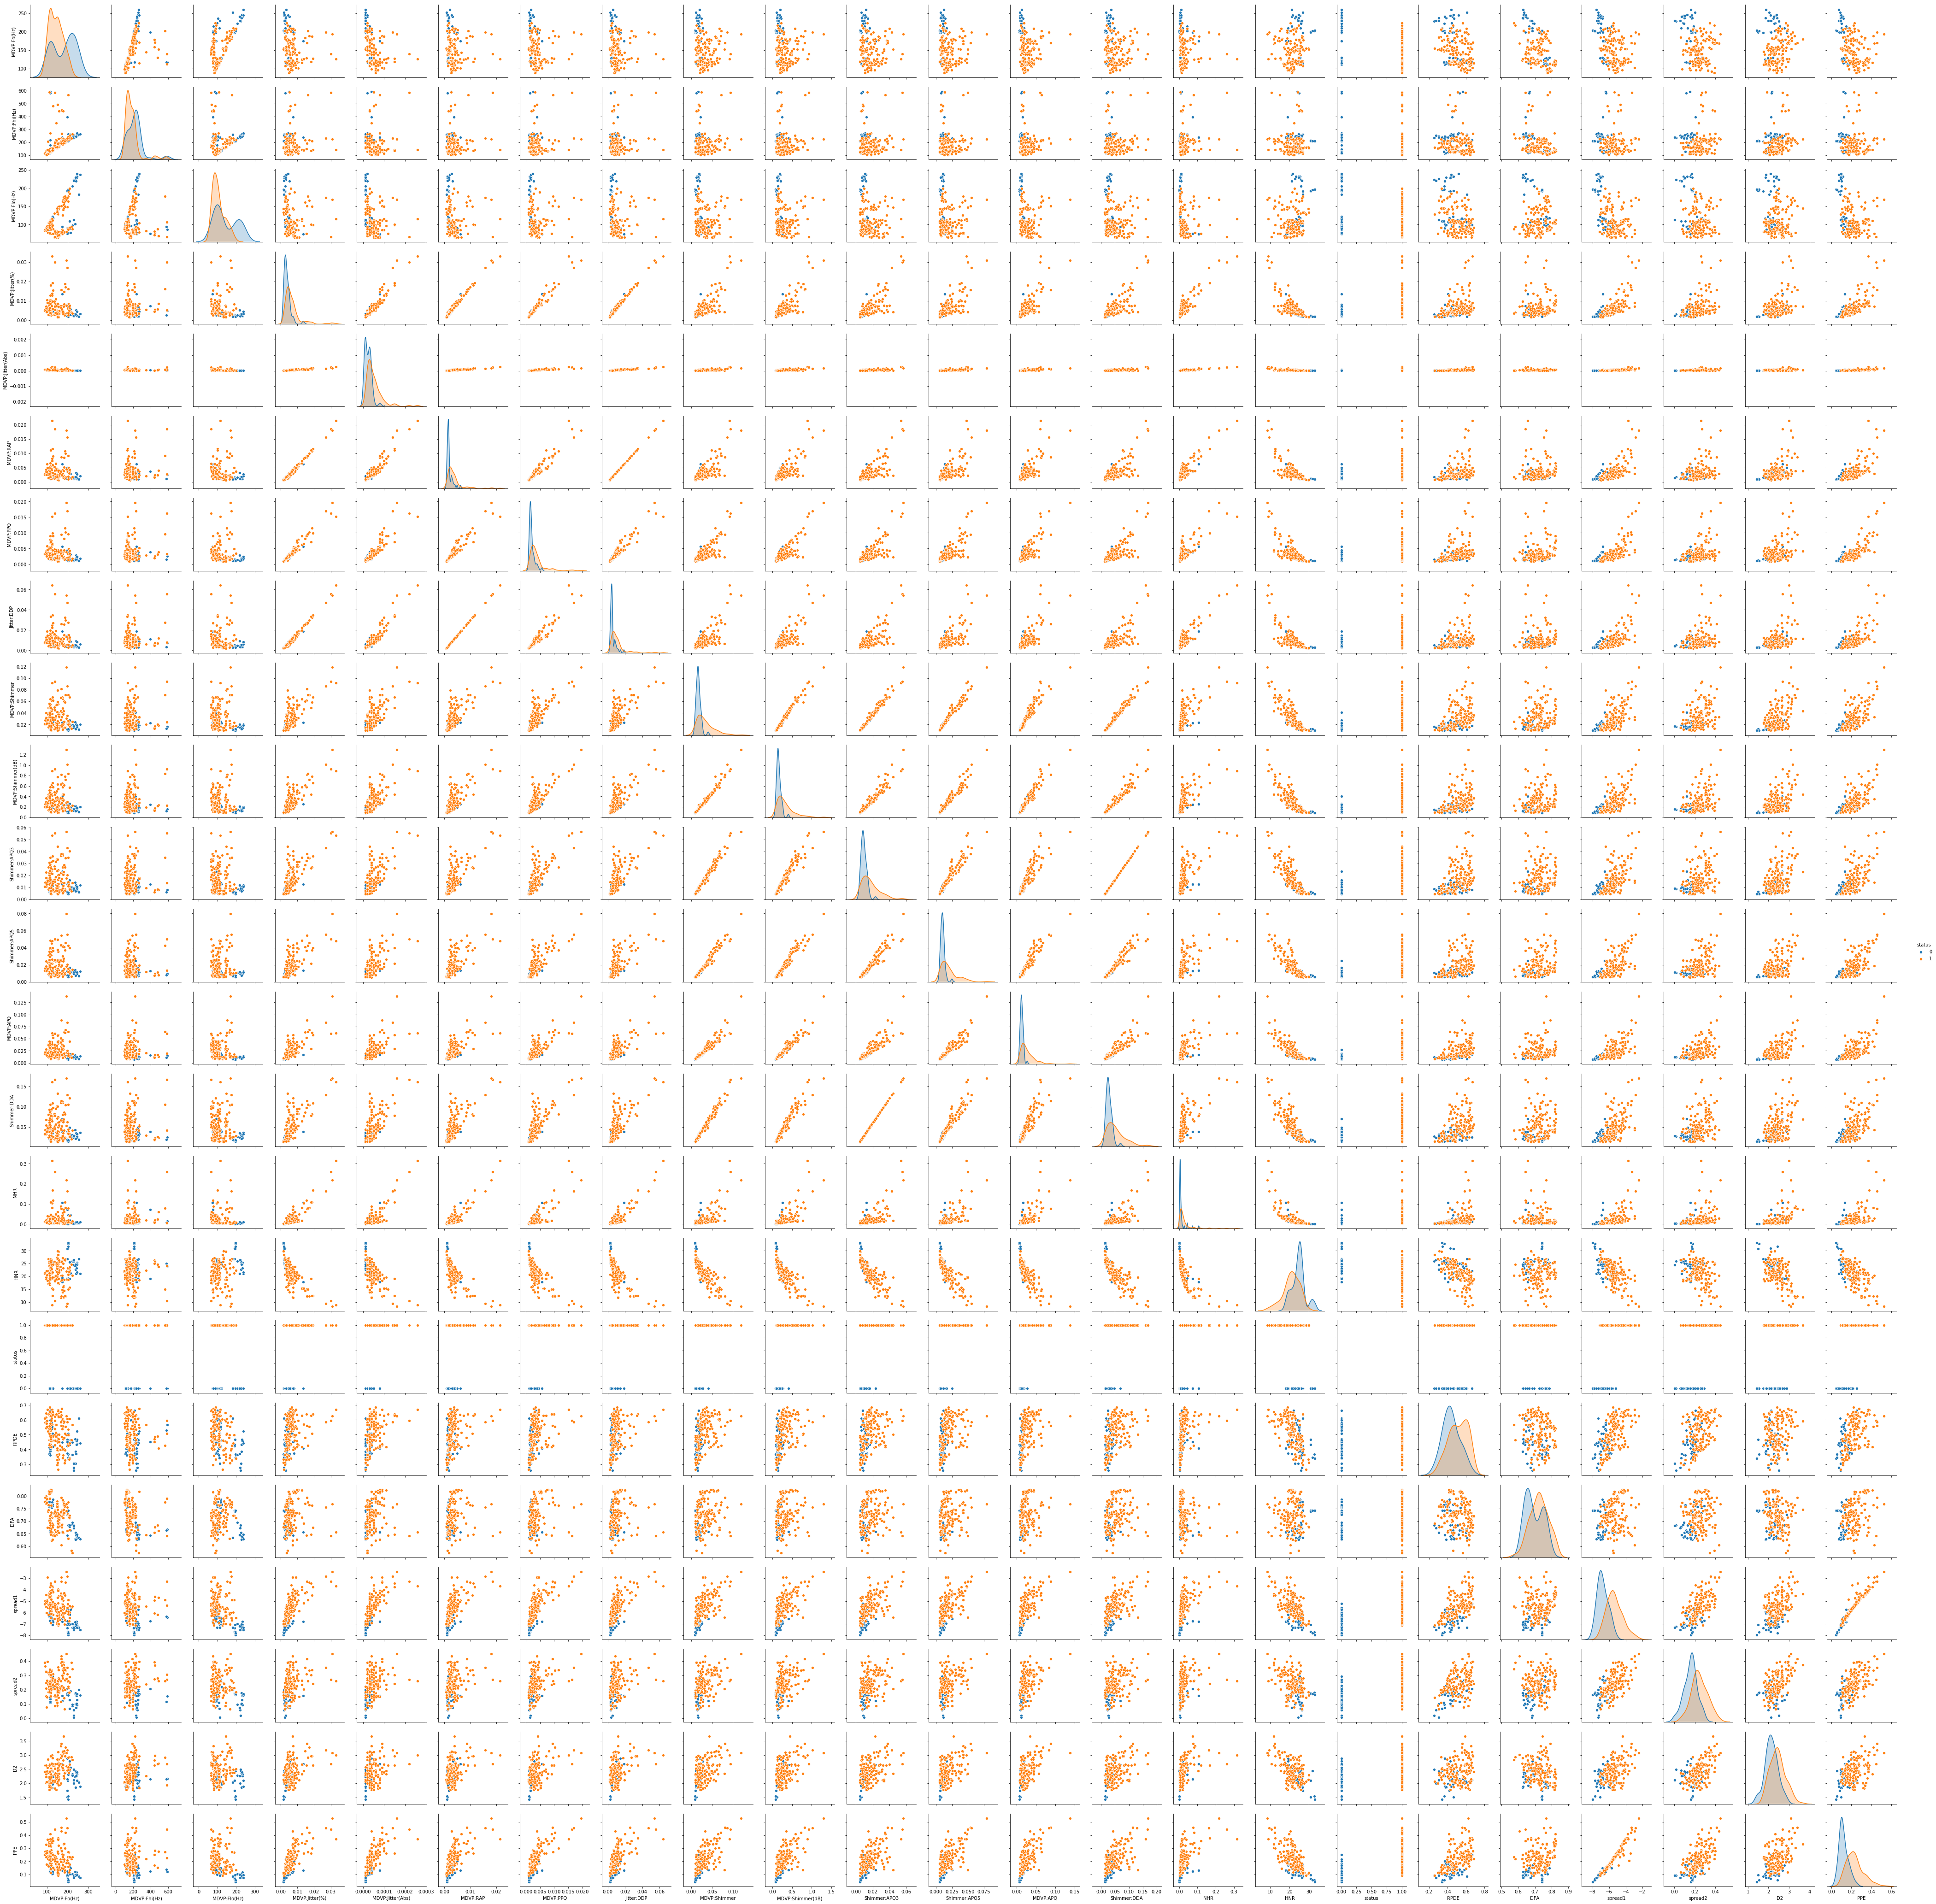

In [15]:
#Pairplot of the data using sns with the two colors representing the two classes
#Orange is for status = 1, meaning patients with parkinson's disease and blue for status = 0 (healthy)
sns.pairplot(PD_df_1, hue = 'status')

#### Key observations and possible challenges to be taken from the pairplot:
1. It's quite evident that there is a presence of strong multicollinearity, which we can understand from the description of attributes. Hence, we need to use feature engineering to eliminate the redundant features.
2. Another very important point is the overlap between the two classes. It can be seen from the pairplot diagonal and off diagonal elements, including the status panel that there is not very clear differentiation of the two classes along the various attributes in most of the cases.
3. We can also visibly see the presence of outliers, but to confirm them we'll use the concept of IQR
4. Looking at the distirbution plots of the variables on the diagonals, long tails can be seen strikingly in some of the attributes, majorly in the frequency and amplitude variation features. The diagonal density curves show that a lot of atributes are not normally distributed.

These are quite major challenges for the classification task at hand. Some of these problems can be linked to the fact that one class is under-represented in the data and the data scales vary

In [16]:
#Function to remove outliers using the concept of inter-quartile range 
def outlier(col, df):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    lowval = q1 - 1.5* iqr
    highval = q3 + 1.5 * iqr
    loc_ret = df.loc[(df[col] > lowval) & (df[col] < highval)]
    return loc_ret

In [17]:
#New dataframw after removal of certain outliers
for col in PD_df_1.columns:
    PD_df_no_out = outlier(col, PD_df_1)

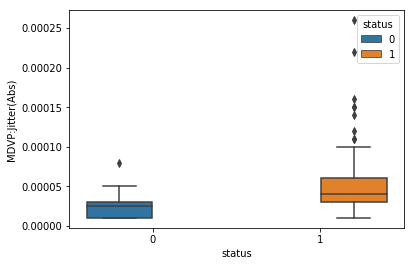

In [18]:
sns.boxplot(PD_df_1['status'], PD_df_1['MDVP:Jitter(Abs)'], hue = PD_df_1['status'])

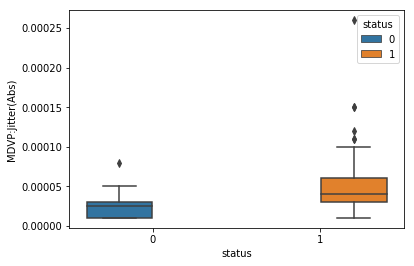

In [19]:
sns.boxplot(PD_df_no_out['status'], PD_df_no_out['MDVP:Jitter(Abs)'], hue = PD_df_no_out['status'])

In [20]:
corr_matrix = PD_df_1.corr()
#print(corr_matrix)

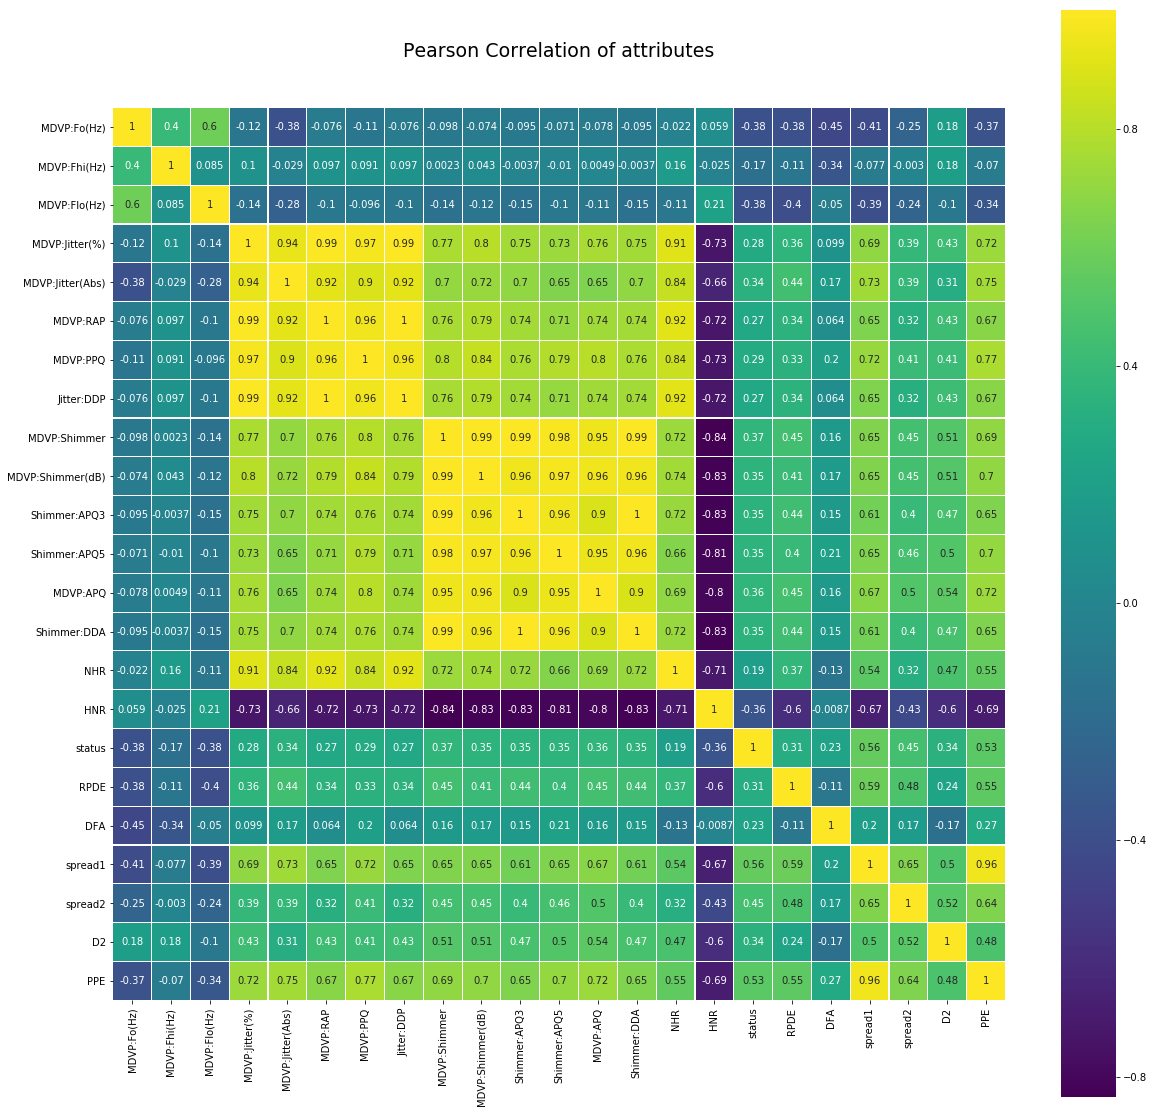

In [21]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(corr_matrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True,)

The above correlation matrix clearly proves the earlier point observed from the pairplot regarding multicollinearity.
There are some very clear boxes of highly correlated features visible in the heatmap, like the frequency and amplitude features and two strips of high negative correlation of the two ratios with the rest of the attributes

In [22]:
#Normalizing the data using zscore
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
PD_df_1_attributes_scaled = pd.DataFrame(ss.fit_transform(PD_df_1_attributes), columns=PD_df_1_attributes.columns)
PD_df_1_z = PD_df_1_attributes_scaled.join(disease_status)

In [585]:
#PD_df_1_z.head()

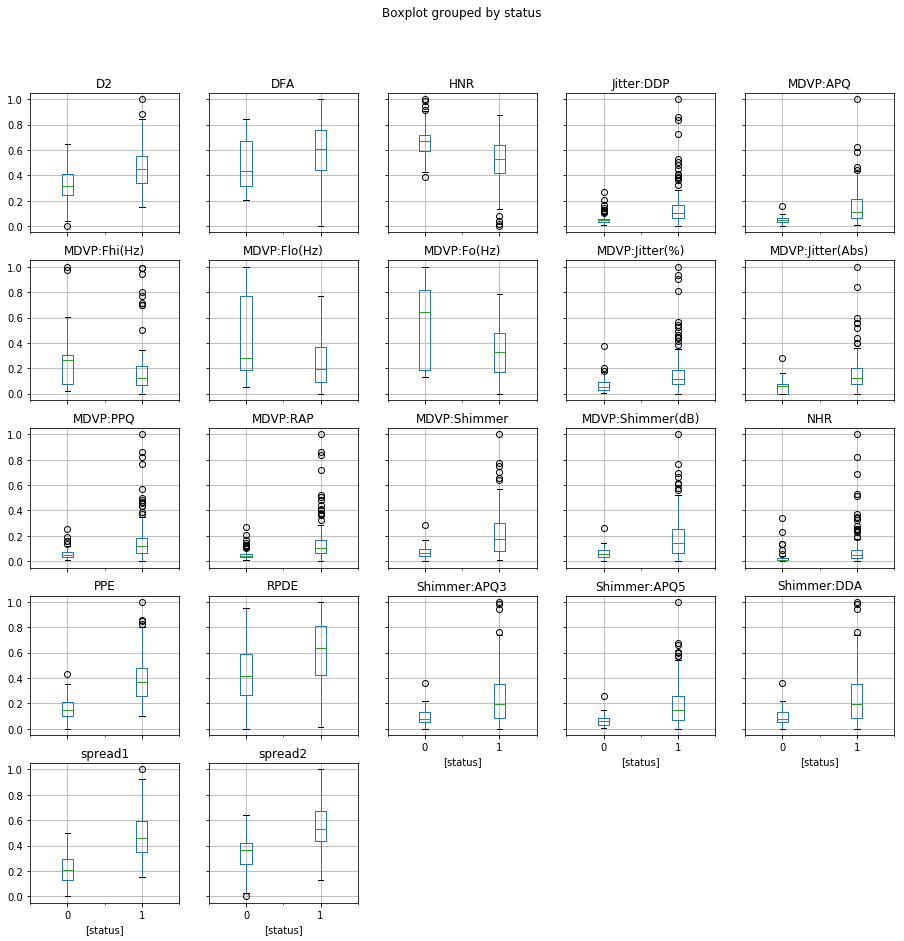

In [23]:
box_plot = PD_df_1_z.boxplot(by="status", figsize=(15,15))

This box plot plotted after scaling the data, shows the presence of outliers in the different attributes. Some other observations from the boxplot:
1. The average, minimum and maximum vocal fundamental frequency is more in healthy patients (status=0)
2. The non linear frquency variation measures are observed to be more in case of parkinson's patients than the healthy ones, which we can understand from common judgement too
3. The above point hold true even in case of the variations in amplitude


## Decision Tree Classifier
For the original dataset

In [24]:
#Splitting the dataset into training and test
X = np.array(PD_df_1_attributes)
y = np.array(disease_status)
seed = 5
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

Over sampling of the training data using SMOTE to deal with imbalance in the dataset

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=seed)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train) 

In [27]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=seed)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [28]:
#A function to obtain classification results
def model_results(model, X_train, y_train, X_test, y_test):
    y_predict_train = model.predict(X_train)
    y_predict = model.predict(X_test)
    acc_base_rf = accuracy_score(y_predict_train , y_train)
    print('Training Accuracy:', accuracy_score(y_predict_train , y_train))
    print('Confusion matrix for train data:\n', confusion_matrix(y_train, y_predict_train))
    print('Test Accuracy:', accuracy_score(y_predict , y_test))
    print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_predict))
    print('Classification report:\n',classification_report(y_test, y_predict))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('AUC score:', roc_auc)

In [29]:
model_results(dt_model, X_train, y_train, X_test, y_test)

Training Accuracy: 1.0
Confusion matrix for train data:
 [[ 32   0]
 [  0 104]]
Test Accuracy: 0.9322033898305084
Confusion matrix for test data:
 [[13  3]
 [ 1 42]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.93      0.98      0.95        43

   micro avg       0.93      0.93      0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

AUC score: 0.8946220930232558


The class imbalance can be clearly seen from the confusion matrix

In [30]:
predicted_values = pd.DataFrame({'status_predicted':y_predict})
predicted_values['actual'] = y_test

NameError: name 'y_predict' is not defined

In [926]:
#predicted_values_df.iloc[:,:2]

### Regularization of parameters of decision tree using GridSearchCV

In [927]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50,70,90,100,120,150],
             'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10] }#'min_samples_split': [2,3,4,5,6,7,8,10,12]}
clf = GridSearchCV(dt_model, tree_para, scoring = 'accuracy' ,cv=8) #8 fold cross validation
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4}


In [928]:
#Regularized decision tree model
dt_model_reg = DecisionTreeClassifier(criterion = 'entropy', max_depth=5 ,min_samples_leaf=4,random_state=seed)
dt_model_reg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [929]:
model_results(dt_model_reg, X_train, y_train, X_test, y_test)

Training Accuracy: 0.9632352941176471
Confusion matrix for train data:
 [[ 31   1]
 [  4 100]]
Test Accuracy: 0.9152542372881356
Confusion matrix for test data:
 [[13  3]
 [ 2 41]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.93      0.95      0.94        43

   micro avg       0.92      0.92      0.92        59
   macro avg       0.90      0.88      0.89        59
weighted avg       0.91      0.92      0.91        59

AUC score: 0.8829941860465116


Results of regularization to get the best parameters for 'max_depth', 'min_samples_leaf':
1. The training accuracy reduced to 0.963 from 1.0
2. The test accuracy also reduced from a value of 0.932 to a value of 0.915
3. Although the accuracy scores reduced, we can observe that overfitting reduced significantly after regularization using 'grid search cv' done using 8 fold cross validation. This is a more stable model
4. This effect can also be seen from the classification report, where the precision and recall values are comparable for both the classes.
5. On fitting the model on normalized data, the accuracies don't improve but there is an improvement in the auc score
6. After removing the outliers also, there isn't any improvement, on the other hand overfitting increases. This tells we need to employ other ways of dealing with the outliers instead of removing them as the dataset size in hand is small.

### Random forest classifier

In [930]:
rf_clf = RandomForestClassifier(bootstrap = False, criterion = 'entropy',random_state = seed)

In [931]:
rf_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=5,
            verbose=0, warm_start=False)

In [932]:
model_results(rf_clf, X_train, y_train, X_test, y_test)

Training Accuracy: 1.0
Confusion matrix for train data:
 [[ 32   0]
 [  0 104]]
Test Accuracy: 0.8813559322033898
Confusion matrix for test data:
 [[13  3]
 [ 4 39]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.93      0.91      0.92        43

   micro avg       0.88      0.88      0.88        59
   macro avg       0.85      0.86      0.85        59
weighted avg       0.88      0.88      0.88        59

AUC score: 0.8597383720930232


#### Hyperparameter tuning for random forest classifier using Grid search CV

In [933]:
para_grids = {
            "n_estimators" : [15,200,5],
            'max_depth'    : [2,3,4,5,6,7,8,9,10,11,12],
#             'min_samples_leaf': [3,4,5]
        }

gs = GridSearchCV(estimator=rf_clf, param_grid=para_grids,scoring = 'accuracy', cv=8, return_train_score=True)
gs.fit(X_train, y_train)
print(gs.best_params_)
results = gs.cv_results_

{'max_depth': 11, 'n_estimators': 200}


In [934]:
rf_clf_optimal = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth = 11
                                        ,n_estimators = 200, random_state = seed)
rf_clf_optimal.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=5,
            verbose=0, warm_start=False)

The best results in random forest were obtained for number of trees = 200

In [935]:
model_results(rf_clf_optimal, X_train, y_train, X_test, y_test)

Training Accuracy: 1.0
Confusion matrix for train data:
 [[ 32   0]
 [  0 104]]
Test Accuracy: 0.9152542372881356
Confusion matrix for test data:
 [[12  4]
 [ 1 42]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.91      0.98      0.94        43

   micro avg       0.92      0.92      0.92        59
   macro avg       0.92      0.86      0.89        59
weighted avg       0.92      0.92      0.91        59

AUC score: 0.8633720930232558


In [958]:
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = PD_df_1_attributes.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = PD_df_1_attributes.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(10,5))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')

                  importance
PPE                 0.123239
spread1             0.107566
MDVP:Fo(Hz)         0.099587
MDVP:APQ            0.078830
MDVP:Flo(Hz)        0.067744
spread2             0.050215
MDVP:Shimmer        0.046929
D2                  0.044393
MDVP:Fhi(Hz)        0.044160
MDVP:Shimmer(dB)    0.039298
Shimmer:APQ5        0.038902
Shimmer:DDA         0.030792
Shimmer:APQ3        0.028139
HNR                 0.026372
RPDE                0.025733
Jitter:DDP          0.025190
DFA                 0.022927
MDVP:Jitter(Abs)    0.022704
MDVP:Jitter(%)      0.021271
MDVP:RAP            0.020996
MDVP:PPQ            0.018465
NHR                 0.016548


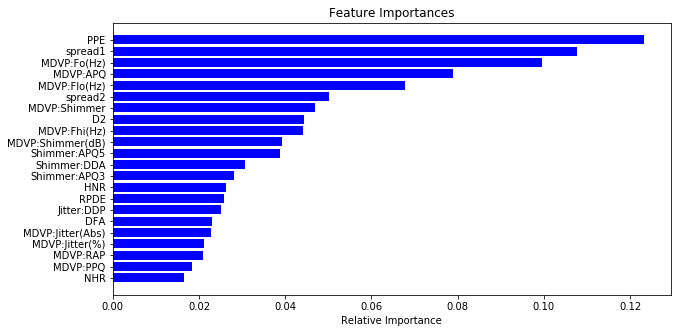

In [959]:
#A plot of relatve feature importance after random forest classifier
plotFeatureImportances(rf_clf_optimal)

## Principal component analysis

MIN MAX NORMALIZATION

In [961]:
from sklearn.preprocessing import MinMaxScaler
z_scaler = MinMaxScaler()
z_data = z_scaler.fit_transform(X)

OVER SAMPLING TO DEAL WITH IMBALANCE IN THE DATA

In [962]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=seed)

SVD followed by PCA

In [1007]:
from sklearn.decomposition import PCA
u, s, vh = np.linalg.svd(z_data, full_matrices=True)
print(s)
var_ratio = []
dummy = 0
for i in s:
    dummy += i**2
for i in range(0,len(s)-5):
    var_ratio.append(s[i]**2)
variance = []
for i in var_ratio:
    variance.append(i/dummy)
print(variance)
pca = PCA(.80)
X_z = pca.fit_transform(z_data)

[2.13517661e+01 7.26886638e+00 4.76240582e+00 3.62651197e+00
 2.73726816e+00 2.50742529e+00 2.26399232e+00 1.85909265e+00
 1.57682063e+00 1.44133677e+00 1.34369539e+00 8.08881428e-01
 5.09436606e-01 4.77871564e-01 3.31693971e-01 2.80942555e-01
 2.44839148e-01 1.81942020e-01 1.25722328e-01 7.89398607e-02
 1.20041574e-03 4.99754472e-04]
[0.7932195311830051, 0.09193040294570083, 0.03946195474551676, 0.02288252917720356, 0.013036484216873225, 0.010939105109127819, 0.008918168857864112, 0.006013507570770455, 0.004326038473795468, 0.0036145706933781107, 0.0031414304550389056, 0.0011384016638352984, 0.0004515502525733343, 0.00039732708387014916, 0.00019142601006212804, 0.00013732855436842254, 0.00010430076976299343]


In [1008]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size=0.3, random_state = seed)

In [1009]:
X_train, y_train = ros.fit_resample(X_train, y_train)

[0.50268407 0.16337416 0.09385052 0.05474926]
[0.50268407 0.66605823 0.75990875 0.81465801]


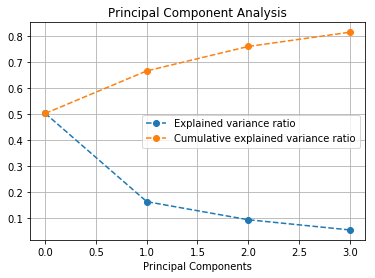

In [1010]:
plt.plot(pca.explained_variance_ratio_, '--o');
plt.plot(pca.explained_variance_ratio_.cumsum(), '--o');
plt.xlabel('Principal Components')
plt.title('Principal Component Analysis')
plt.grid(True)
plt.legend(('Explained variance ratio', 'Cumulative explained variance ratio'),loc='best')
print(pca.explained_variance_ratio_)
print((pca.explained_variance_ratio_.cumsum()))

The array showing the cumulative explained variance ratios shows that more than 50% of the data is explained by the first component. By setting the threshold value in PCA as 0.8, 0.85, 0.9 and 0.95 we observe that the best set of values are obtained for a value of 0.8, which we can explain using the variance values. 

#### Decision Tree classifier after transformation of features using PCA

In [1011]:
dt_model_pca = DecisionTreeClassifier(criterion = 'entropy', random_state=seed, min_samples_leaf=2, max_depth=7)
dt_model_pca.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [1012]:
model_results(dt_model_pca, X_train, y_train, X_test, y_test)

Training Accuracy: 0.9855769230769231
Confusion matrix for train data:
 [[103   1]
 [  2 102]]
Test Accuracy: 0.9491525423728814
Confusion matrix for test data:
 [[14  2]
 [ 1 42]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.95      0.98      0.97        43

   micro avg       0.95      0.95      0.95        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.95      0.95      0.95        59

AUC score: 0.9258720930232558


The accuracy significantly improves after oversampling and PCA along with a reduction in overfitting

#### Regularization of Decision Tree after PCA

In [1013]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50,70,90,100,120,150],
             'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
             #'min_samples_split': [2,3,4,5,6,7,8,10,12]
            }
clf_gs = GridSearchCV(dt_model_pca, tree_para, scoring = 'accuracy' ,cv=8)
clf_gs.fit(X_train,y_train)
print(clf_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1}


In [1014]:
dt_model_pca_opt = DecisionTreeClassifier(criterion = 'entropy', random_state=seed, min_samples_leaf=1, max_depth=6)
dt_model_pca_opt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [1015]:
model_results(dt_model_pca_opt, X_train, y_train, X_test, y_test)

Training Accuracy: 0.9711538461538461
Confusion matrix for train data:
 [[103   1]
 [  5  99]]
Test Accuracy: 0.9322033898305084
Confusion matrix for test data:
 [[14  2]
 [ 2 41]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.95      0.95      0.95        43

   micro avg       0.93      0.93      0.93        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.93      0.93      0.93        59

AUC score: 0.9142441860465116


### Random forest classifier with PCA

In [1016]:
rf_clf_pca = RandomForestClassifier(bootstrap = False, criterion = 'entropy',random_state = seed)
rf_clf_pca.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=5,
            verbose=0, warm_start=False)

In [1017]:
model_results(rf_clf_pca, X_train, y_train, X_test, y_test)

Training Accuracy: 1.0
Confusion matrix for train data:
 [[104   0]
 [  0 104]]
Test Accuracy: 0.9152542372881356
Confusion matrix for test data:
 [[14  2]
 [ 3 40]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.95      0.93      0.94        43

   micro avg       0.92      0.92      0.92        59
   macro avg       0.89      0.90      0.89        59
weighted avg       0.92      0.92      0.92        59

AUC score: 0.9026162790697674


The accuracy value doesn't improve much for a base random forest classifier but performance goes up by an increased value of AUC score.

#### Hyperparameter tuning for random forest classifier  with PCA using Grid search CV 

In [1018]:
para_grids = {
            "n_estimators" : [15,200,5],
            'max_depth'    : [2,3,4,5,6,7,8,9,10,11,12],
#             'min_samples_leaf': [3,4,5]
        }

gs_pca = GridSearchCV(estimator=rf_clf, param_grid=para_grids,scoring = 'accuracy', cv=8, return_train_score=True)
gs_pca.fit(X_train, y_train)
print(gs_pca.best_params_)
results = gs_pca.cv_results_

{'max_depth': 6, 'n_estimators': 5}


In [1019]:
rf_clf_optimal_pca = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth =6
                                        ,n_estimators = 5, random_state = seed)
rf_clf_optimal_pca.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=None, oob_score=False, random_state=5,
            verbose=0, warm_start=False)

In [1020]:
model_results(rf_clf_optimal_pca, X_train, y_train, X_test, y_test)

Training Accuracy: 0.9807692307692307
Confusion matrix for train data:
 [[104   0]
 [  4 100]]
Test Accuracy: 0.9491525423728814
Confusion matrix for test data:
 [[14  2]
 [ 1 42]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.95      0.98      0.97        43

   micro avg       0.95      0.95      0.95        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.95      0.95      0.95        59

AUC score: 0.9258720930232558


This is the best accuracy score obtained in case of random forest classifier done after PCA and oversampling.
The number of trees  = 5

### Inferences and Conclusion:

1. After regularization and hyperparameter tuning in decision tree classifier and random forest respectively, we observed a increase in accuracy and a decrease in overfitting
2. By looking at the correlation plot, we observed that there was strong multicollinearity in the features, hence it is expected that there would be mnay redundant features and hence, PCA was performed. After performing PCA, there was a significant rise in accuracy and also overfitting reduced even more.
3. Oversampling technique gave very good results along with pca as it helped remove the class imbalance by creating more samples of the minority class in the training data
4. Random forest gave the best accuracy with PCA and oversampling method, with a value of: 0.981 on training and 0.949 on the test data. 
5. Decision tree classifier also gave the best results with pca, with a training accuracy of 0.986 and 0.949 on test data